## 0.0 Importações

In [1]:
import pandas as pd
import inflection
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.graph_objects as go


### 0.1 Carregamento da base

In [2]:
df_raw = pd.read_csv(r"..\Data\matriculasFinal-phase2.csv",sep=';', encoding='latin')


## 1.0 Descrição dos dados

In [3]:
df1 = df_raw.copy()
df1.head()

,Cod_Pessoa,cod_matricula,__Dt_Conclusao_Ensino_Medio,Matriz_Estrutura_Curso,ano_letivo_ini,Periodo_letivo_ini,Sit_Matricula,Ano_Let_Atual,Periodo_Let_Atual,Periodo_Atual,...,Desc_Turno_Ini,dt_matricula,DT_Rematricula,clPeriodo_Let_ini,Qtd_Periodos,Ultima_Aula_Presente,Ultimo_Periodo_Letivo_Presente,Situacao_Ultimo_Periodo_Letivo,DESC_SIT_MATRICULA_PERIODO,Ultimo_Evento_Matricula
0,414628,518696,1986.0,32,2023,2,2,2024,1,2,...,Integral,13/07/2023,13/07/2023,2023/2,10,30/09/2024,2024/1,Trancado,Trancado,Trancamento de Período: 04/03/2024
1,98957,97636,2008.0,32,2012,2,10,2016,2,7,...,Matutino,10/12/2012,10/12/2012,2012/2,11,20/03/2017,2016/2,Cancelou,Cancelou,Cancelamento Voluntário: 31/10/2016
2,98957,205828,2008.0,32,2016,2,18,2016,2,1,...,Matutino,31/10/2016,31/10/2016,2016/2,11,20/03/2017,2016/2,Aprovado,Aprovado,Concluiu: 06/04/2017
3,436461,519459,2022.0,32,2023,2,0,2024,2,10,...,Integral,20/07/2023,20/07/2023,2023/2,10,05/12/2024,2024/2,Matriculado,Matriculado,Renovou matrícula: 20/07/2023
4,108508,107372,NaN,32,2013,1,9,2017,2,6,...,Matutino,21/05/2013,21/05/2013,2013/1,11,19/07/2017,2017/1,Abandonou,Abandonou,Desistência (Evasão): 26/09/2017


In [34]:
df1["cidade"] = df1["texto_cidade"].apply(lambda x: x if pd.isna(x) else x.split(' ')[0])
df1["cidade"] = df1["cidade"].apply(lambda x: x if pd.isna(x) else x.replace(' ',""))

df1.head()

df_mapa =  pd.DataFrame(df1.pivot_table(index="cidade", values="cod_matricula", aggfunc="count").sort_values("cod_matricula", ascending=False))  

AttributeError: 'DataFrame' object has no attribute 'type'

### 1.1 Dimensão dos dados

In [5]:
print(f"Número de linhas: {df1.shape[0]}")
print(f"Número de colunas: {df1.shape[1]}")

Número de linhas: 1632
Número de colunas: 55


### 1.2 Renomeando as colunas

In [ ]:
def snake_case(df):
    cols_old = df.columns.to_list()
    snakecase = lambda x: inflection.underscore(x)
    cols_new = map(snakecase, cols_old)
    df.columns = cols_new
    return df

df1 = snake_case(df1)


### 1.3 tipo dos dados

In [9]:
df1.dtypes

cod_pessoa                          int64
cod_matricula                       int64
__dt_conclusao_ensino_medio       float64
matriz_estrutura_curso              int64
ano_letivo_ini                      int64
periodo_letivo_ini                  int64
sit_matricula                       int64
ano_let_atual                       int64
periodo_let_atual                   int64
periodo_atual                       int64
dt_nascimento                      object
cod_aluno                           int64
tipo_escola_origem                 object
sexo                               object
cod_cidade                        float64
texto_cidade                       object
desc_forma_ingresso_matricula      object
ano_conclusao_2_grau              float64
cod_escola_2_grau                 float64
cod_grau_instrucao_mae             object
pai_falecido                      float64
mae_falecida                      float64
tipo_escola_origem_1               object
desc_cor                          

### 1.2 Checando dados nulos

In [10]:
df1.isna().sum()

cod_pessoa                          0
cod_matricula                       0
__dt_conclusao_ensino_medio       174
matriz_estrutura_curso              0
ano_letivo_ini                      0
periodo_letivo_ini                  0
sit_matricula                       0
ano_let_atual                       0
periodo_let_atual                   0
periodo_atual                       0
dt_nascimento                       0
cod_aluno                           0
tipo_escola_origem                173
sexo                                0
cod_cidade                         14
texto_cidade                       14
desc_forma_ingresso_matricula       0
ano_conclusao_2_grau              174
cod_escola_2_grau                 146
cod_grau_instrucao_mae            794
pai_falecido                       65
mae_falecida                       59
tipo_escola_origem_1              173
desc_cor                            0
cod_pessoa_1                        0
cod_grau_instrucao                597
cod_nacional

## 2.0 Feature Engineering

In [11]:
df1["desc_tipo_escola_origem"] = df1["desc_tipo_escola_origem"].apply(lambda x: "Pública" if "Pública" in str(x) else x)


In [12]:
df1 ["dt_ultimo_evento"]  = df1['ultimo_evento_matricula'].apply(lambda x: x if pd.isna(x) else x.split(': ')[1])
df1["dt_ultimo_evento"] = pd.to_datetime(df1["dt_ultimo_evento"], format='%d/%m/%Y')

In [37]:
df1["ano_letivo_ultimo_evento"] = df1["dt_ultimo_evento"].dt.year.astype(float)
df1["periodo_letivo_ultimo_evento"] = df1["dt_ultimo_evento"].month()
df1.head()
df1.dtypes

AttributeError: 'Series' object has no attribute 'month'

## 2.0 Perguntas à serem respondidas:

### 1 Qual a distribuição dos alunos por cidade ?

### 2.1 Qual é a distribuição das situações de matrícula (ativo, trancado, jubilado, etc.)?

In [19]:
df1.columns

Index(['cod_pessoa', 'cod_matricula', '__dt_conclusao_ensino_medio',
       'matriz_estrutura_curso', 'ano_letivo_ini', 'periodo_letivo_ini',
       'sit_matricula', 'ano_let_atual', 'periodo_let_atual', 'periodo_atual',
       'dt_nascimento', 'cod_aluno', 'tipo_escola_origem', 'sexo',
       'cod_cidade', 'texto_cidade', 'desc_forma_ingresso_matricula',
       'ano_conclusao_2_grau', 'cod_escola_2_grau', 'cod_grau_instrucao_mae',
       'pai_falecido', 'mae_falecida', 'tipo_escola_origem_1', 'desc_cor',
       'cod_pessoa_1', 'cod_grau_instrucao', 'cod_nacionalidade',
       'cod_estado_civil', 'cod_cidade_1', 'sexo_1', 'dt_nascimento_1',
       'cod_naturalidade', 'estado_titulo_ele', 'data_titulo_ele',
       'dt_cadastro', 'coeficiente_rendimento', 'desc_nacionalidade',
       'desc_escola_2_grau', 'desc_naturalidade', 'cod_turno', 'desc_turno',
       'desc_estado_civil', 'desc_tipo_escola_origem', 'desc_sit_matricula',
       'desc_cota', 'desc_turno_ini', 'dt_matricula', 'dt_re

In [15]:

df1["desc_sit_matricula"].value_counts( normalize=True)*100

desc_sit_matricula
Abandono                      33.455882
Matriculado                   21.752451
Cancelado Voluntariamente     17.340686
Formado                       17.279412
Transferido Interno            3.370098
Cancelado Compulsoriamente     3.125000
Trancado                       2.267157
Transferido Externo            1.102941
Estagiario (Concludente)       0.183824
Concludente                    0.122549
Name: proportion, dtype: float64

### 2.2 Qual é a relação entre o tipo de escola de origem (pública ou privada) e a situação de matrícula?

In [16]:
df1["desc_tipo_escola_origem"].value_counts( normalize=True)*100

desc_tipo_escola_origem
Pública         57.093900
Privada         39.821796
Outros           2.261823
Filantrópica     0.822481
Name: proportion, dtype: float64

### 2.3 Como a situação de matrículas dos alunos estão distribuídas em relação ao sexo?

In [17]:
masculino = df1[df1["sexo"] == "M"]["desc_sit_matricula"].value_counts( normalize=True)*100
feminino = df1[df1["sexo"] == "F"]["desc_sit_matricula"].value_counts( normalize=True)*100

In [18]:
d1 = pd.DataFrame (feminino)
d2 = pd.DataFrame (masculino)
m = pd.concat([d1,d2], axis=1)
m.columns = ["feminino","masculino"]
m.reset_index(inplace = True)
m['delta'] = m['masculino'] - m['feminino']
m


#print (f"Situação de matrículas do sexo feminino:{proportion_f} \n\n\n Situação de matrículas do sexo feminino:{proportion_m}")#

,desc_sit_matricula,feminino,masculino,delta
0,Abandono,28.370787,34.874608,6.503822
1,Matriculado,24.157303,21.081505,-3.075799
2,Cancelado Voluntariamente,18.539326,17.006270,-1.533056
3,Formado,18.258427,17.006270,-1.252157
4,Trancado,3.651685,1.880878,-1.770808
5,Cancelado Compulsoriamente,3.089888,3.134796,0.044909
6,Transferido Interno,2.808989,3.526646,0.717657
7,Transferido Externo,1.123596,1.097179,-0.026417
8,Estagiario (Concludente),NaN,0.235110,NaN
9,Concludente,NaN,0.156740,NaN


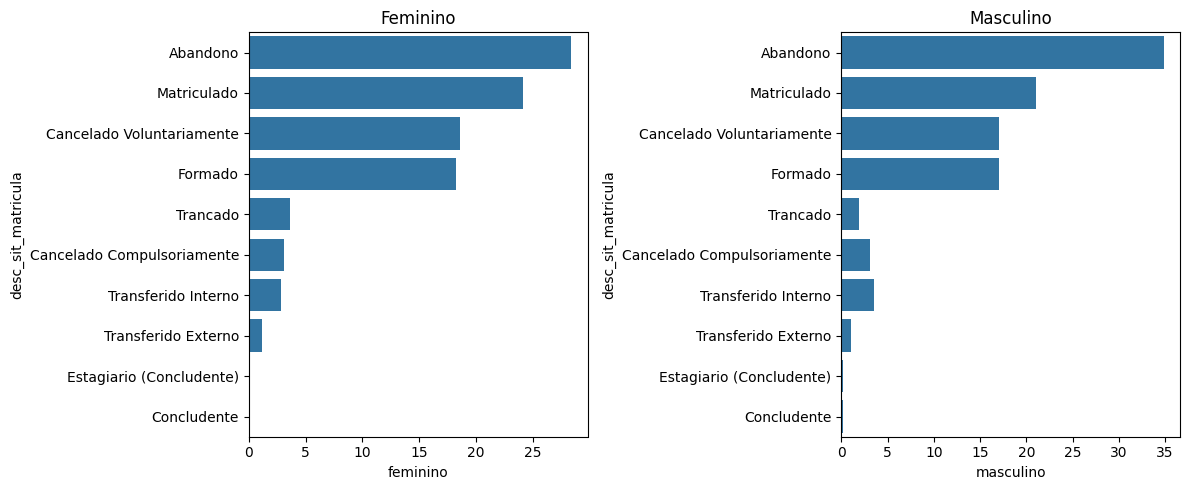

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1
sns.barplot(data=m, x='feminino', y='desc_sit_matricula',  ax=axes[0])
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo X
axes[0].set_title("Feminino")
#axes[0].tick_params(rotation=90)  # Rotaciona os rótulos do eixo X


# Gráfico 2
sns.barplot(data=m, x='masculino', y='desc_sit_matricula', ax=axes[1])
axes[1].set_title("Masculino")
axes[1].tick_params(axis='x', rotation=360)  # Rotaciona os rótulos do eixo X

#max_y = max(m['masculino'].max()*1,3, m['feminino'].max()*1,3)  # Valor máximo entre os dois datasets
#axes[0].set_ylim(0, max_y)
#axes[1].set_ylim(0, max_y)
plt.tight_layout()
plt.show()


### 2.4 Qual é o tempo médio para que um aluno mude de "ativo" para outra situação (como "trancado" ou "desistente")?

In [20]:
df1["ultimo_evento_matricula"].value_counts( normalize=True)*100   

ultimo_evento_matricula
Desistência (Evasão): 20/09/2022       3.923973
Desistência (Evasão): 04/11/2024       1.778050
Renovou matrícula: 27/09/2024          1.778050
Desistência (Evasão): 16/03/2023       1.594114
Desistência (Evasão): 20/02/2020       1.532802
                                         ...   
Transferência Interna: 02/06/2016      0.061312
Cancelamento Voluntário: 23/05/2012    0.061312
Renovou matrícula: 27/02/2020          0.061312
Renovou matrícula: 21/08/2017          0.061312
Cancelamento Voluntário: 04/09/2012    0.061312
Name: proportion, Length: 565, dtype: float64

### 2.5 Existe uma correlação entre o coeficiente de rendimento e mudanças na situação de matrícula?

In [21]:
df1['coeficiente_rendimento'] = df1['coeficiente_rendimento'].str.replace(',', '.').astype(float)

In [22]:
np.mean(df1['coeficiente_rendimento'])
np.median(df1['coeficiente_rendimento'])

5.045

### 2.1 Qual é a distribuição das situações de matrícula (ativo, trancado, jubilado, etc.)?

### 2.1 Qual é a quantidade de evasão por período ? 

In [39]:
df1.columns

Index(['cod_pessoa', 'cod_matricula', '__dt_conclusao_ensino_medio',
       'matriz_estrutura_curso', 'ano_letivo_ini', 'periodo_letivo_ini',
       'sit_matricula', 'ano_let_atual', 'periodo_let_atual', 'periodo_atual',
       'dt_nascimento', 'cod_aluno', 'tipo_escola_origem', 'sexo',
       'cod_cidade', 'texto_cidade', 'desc_forma_ingresso_matricula',
       'ano_conclusao_2_grau', 'cod_escola_2_grau', 'cod_grau_instrucao_mae',
       'pai_falecido', 'mae_falecida', 'tipo_escola_origem_1', 'desc_cor',
       'cod_pessoa_1', 'cod_grau_instrucao', 'cod_nacionalidade',
       'cod_estado_civil', 'cod_cidade_1', 'sexo_1', 'dt_nascimento_1',
       'cod_naturalidade', 'estado_titulo_ele', 'data_titulo_ele',
       'dt_cadastro', 'coeficiente_rendimento', 'desc_nacionalidade',
       'desc_escola_2_grau', 'desc_naturalidade', 'cod_turno', 'desc_turno',
       'desc_estado_civil', 'desc_tipo_escola_origem', 'desc_sit_matricula',
       'desc_cota', 'desc_turno_ini', 'dt_matricula', 'dt_re

In [41]:
df1["situacao_ultimo_periodo_letivo"].unique()

array(['Trancado', 'Cancelou', 'Aprovado', 'Matriculado', 'Abandonou',
       'Transferido Interno', 'Cancelou Compulsório',
       'Pediu Transf. Externa', 'Aprovado Parcialmente',
       'Concluiu Estágio', 'Trancou', 'Colou Grau', 'Concludente',
       'Projeto Final (Concludente)', 'Estagiario (Concludente)'],
      dtype=object)

In [66]:
datas = df1[df1["situacao_ultimo_periodo_letivo"] == "Abandonou"]
datas = pd.DataFrame(datas["ano_let_atual"].value_counts()).reset_index()

In [70]:
datas   

,ano_let_atual,count
0,2022,51
1,2018,49
2,2016,45
3,2012,37
4,2024,37
5,2019,36
6,2020,35
7,2017,34
8,2014,34
9,2013,32


In [15]:
df1.columns

Index(['cod_pessoa', 'cod_matricula', '__dt_conclusao_ensino_medio',
       'matriz_estrutura_curso', 'ano_letivo_ini', 'periodo_letivo_ini',
       'sit_matricula', 'ano_let_atual', 'periodo_let_atual', 'periodo_atual',
       'dt_nascimento', 'cod_aluno', 'tipo_escola_origem', 'sexo',
       'cod_cidade', 'texto_cidade', 'desc_forma_ingresso_matricula',
       'ano_conclusao_2_grau', 'cod_escola_2_grau', 'cod_grau_instrucao_mae',
       'pai_falecido', 'mae_falecida', 'tipo_escola_origem_1', 'desc_cor',
       'cod_pessoa_1', 'cod_grau_instrucao', 'cod_nacionalidade',
       'cod_estado_civil', 'cod_cidade_1', 'sexo_1', 'dt_nascimento_1',
       'cod_naturalidade', 'estado_titulo_ele', 'data_titulo_ele',
       'dt_cadastro', 'coeficiente_rendimento', 'desc_nacionalidade',
       'desc_escola_2_grau', 'desc_naturalidade', 'cod_turno', 'desc_turno',
       'desc_estado_civil', 'desc_tipo_escola_origem', 'desc_sit_matricula',
       'desc_cota', 'desc_turno_ini', 'dt_matricula', 'dt_re

In [16]:
df_gen = pd.pivot_table(df1, index = "ano_letivo_ini", columns= "sexo", values= "cod_matricula", aggfunc= "count").reset_index()


In [17]:
df_gen

sexo,ano_letivo_ini,F,M
0,2007,10,49
1,2008,10,54
2,2009,9,58
3,2010,22,63
4,2011,22,75
5,2012,11,76
6,2013,19,78
7,2014,13,62
8,2015,27,74
9,2016,35,100


In [7]:
df1.columns

Index(['Cod_Pessoa', 'cod_matricula', '__Dt_Conclusao_Ensino_Medio',
       'Matriz_Estrutura_Curso', 'ano_letivo_ini', 'Periodo_letivo_ini',
       'Sit_Matricula', 'Ano_Let_Atual', 'Periodo_Let_Atual', 'Periodo_Atual',
       'Dt_Nascimento', 'Cod_Aluno', 'Tipo_escola_Origem', 'sexo',
       'Cod_cidade', 'Texto_cidade', 'Desc_Forma_Ingresso_Matricula',
       'Ano_Conclusao_2_Grau', 'Cod_Escola_2_Grau', 'Cod_Grau_Instrucao_Mae',
       'Pai_Falecido', 'Mae_Falecida', 'Tipo_Escola_Origem_1', 'Desc_Cor',
       'Cod_Pessoa_1', 'Cod_Grau_Instrucao', 'Cod_Nacionalidade',
       'Cod_Estado_Civil', 'Cod_Cidade_1', 'Sexo_1', 'Dt_Nascimento_1',
       'Cod_Naturalidade', 'Estado_Titulo_Ele', 'Data_Titulo_Ele',
       'Dt_Cadastro', 'Coeficiente_Rendimento', 'DESC_NACIONALIDADE',
       'Desc_Escola_2_Grau', 'Desc_Naturalidade', 'Cod_Turno', 'Desc_Turno',
       'Desc_Estado_Civil', 'Desc_Tipo_Escola_Origem', 'Desc_Sit_Matricula',
       'Desc_Cota', 'Desc_Turno_Ini', 'dt_matricula', 'DT_Re

In [5]:
df_gen

,sexo,count
1,F,356
0,M,1276
